In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from modules.utils import fetch_ibge_series

<Axes: xlabel='data'>

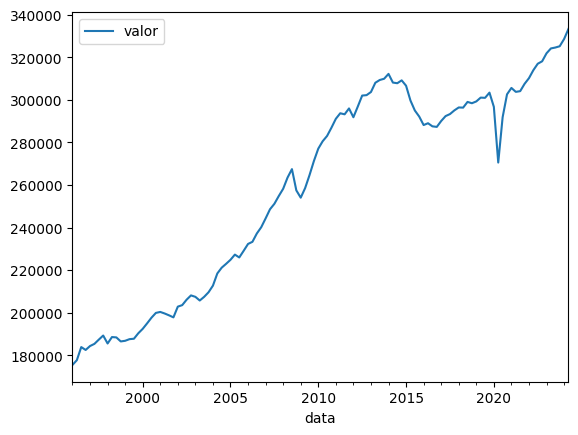

In [2]:
parametros = '/t/6613/v/9319/p/all/C11255/90707/n1/1'
df = fetch_ibge_series(parametros)
df.plot(x='data',y='valor')

In [3]:
from scipy.fft import fft, fftfreq, ifft

dfa = df.copy()
y = df['valor'].values
yf = fft(y)

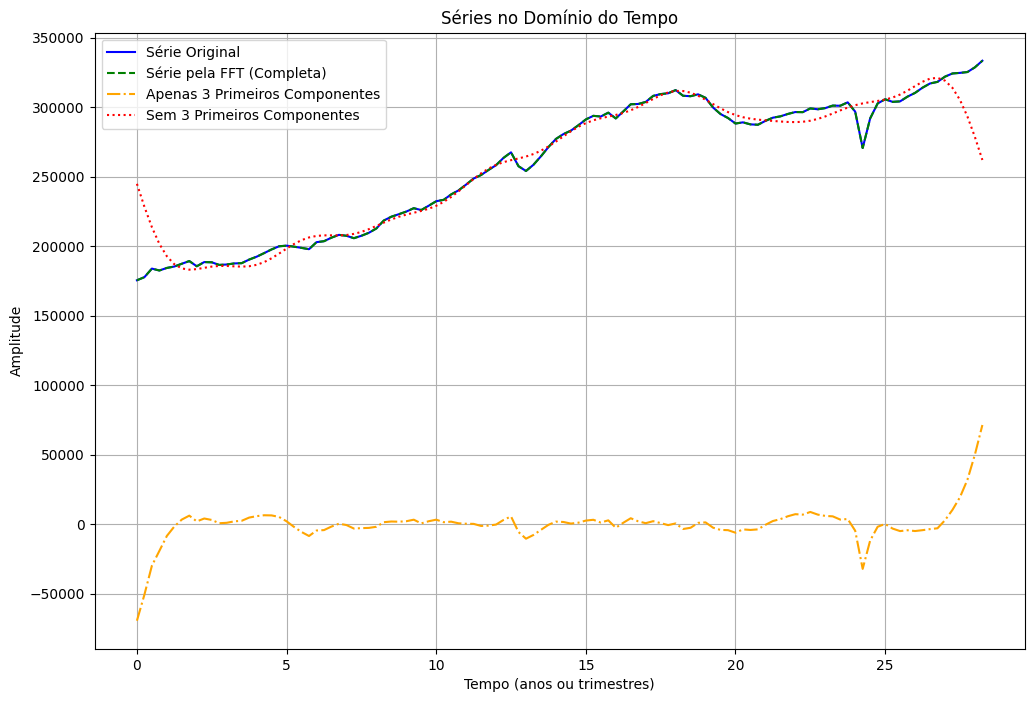

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Supomos que você já tem a série original `y` e a FFT calculada `yf`
# Parâmetros
N = len(y)  # Número de amostras
fs = 4      # Taxa de amostragem (ciclos por ano)
time = np.arange(N) / fs  # Eixo do tempo (em anos ou trimestres)

# Reconstruir a série estimada pela FFT (IFFT completa)
y_fft_full = np.fft.ifft(yf)

i=10
j=110
# Apenas os 3 primeiros componentes
yf_3_components = np.zeros_like(yf)  # Criar uma FFT zerada
yf_3_components[i:j] = yf[i:j]         # Manter apenas os 3 primeiros componentes
y_3_components = np.fft.ifft(yf_3_components)

# Sem os 3 primeiros componentes
yf_without_3 = yf.copy()
yf_without_3[i:j] = 0                 # Zerar as 3 primeiras componentes
y_without_3 = np.fft.ifft(yf_without_3)

# Plotar todas as séries no domínio do tempo
plt.figure(figsize=(12, 8))

# Série original
plt.plot(time, y, label='Série Original', color='blue')

# Série estimada pela FFT completa
plt.plot(time, np.real(y_fft_full), label='Série pela FFT (Completa)', linestyle='--', color='green')

# Apenas os 3 primeiros componentes
plt.plot(time, np.real(y_3_components), label='Apenas 3 Primeiros Componentes', linestyle='-.', color='orange')

# Sem os 3 primeiros componentes
plt.plot(time, np.real(y_without_3), label='Sem 3 Primeiros Componentes', linestyle=':', color='red')

plt.title('Séries no Domínio do Tempo')
plt.xlabel('Tempo (anos ou trimestres)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


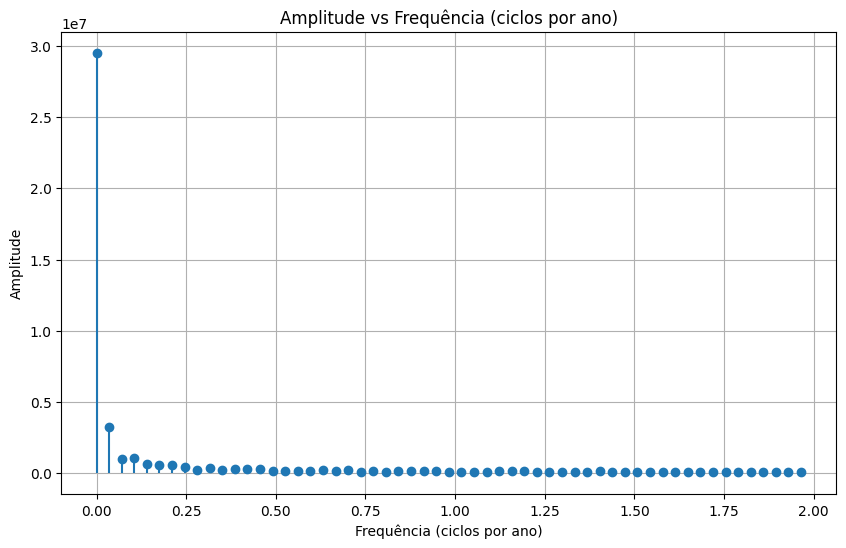

In [5]:
# Suponha que você já tenha a série transformada (FFT)
N = len(yf)  # Número de pontos
fs = 4       # Taxa de amostragem em ciclos por ano (1 ponto por trimestre)

# Frequências em ciclos por ano
frequencies_cpa = np.fft.fftfreq(N, d=1/fs)

# Amplitude (módulo dos números complexos)
amplitudes = np.abs(yf)

# Filtrar apenas as frequências positivas
positive_freqs = frequencies_cpa[:N//2]
positive_amplitudes = amplitudes[:N//2]

# Plotar
plt.figure(figsize=(10, 6))
plt.stem(positive_freqs, positive_amplitudes, basefmt=" ")
plt.title('Amplitude vs Frequência (ciclos por ano)')
plt.xlabel('Frequência (ciclos por ano)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [6]:
len(amplitudes)

114

In [8]:
len(yf)

114

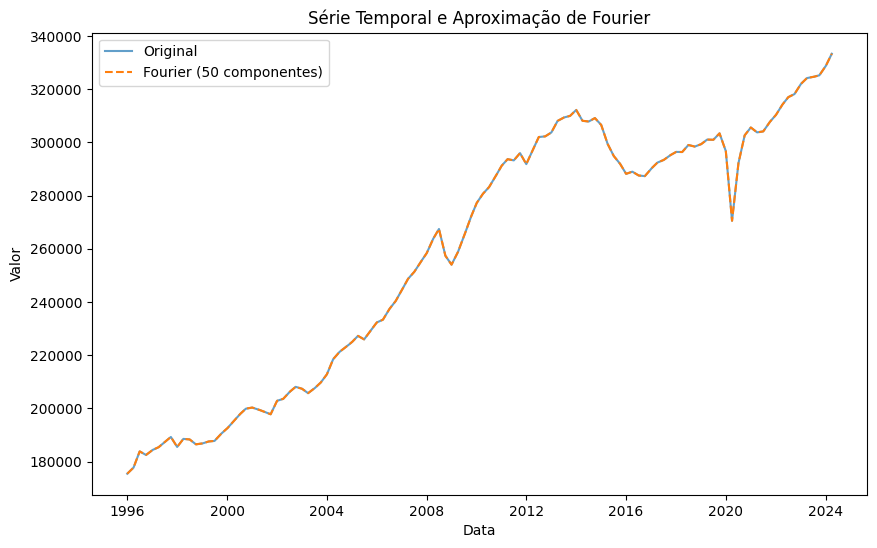

In [22]:

from scipy.fft import fft, fftfreq, ifft

# Interpolação para preencher dados entre as datas (se necessário)
df = dfo.copy()
df.set_index('data', inplace=True)
df = df.asfreq('D')  # Preenchendo diariamente
df['valor'] = df['valor'].interpolate()

# Obtenha os valores da série temporal
y = df['valor'].values
n = len(y)

# Transformada de Fourier
yf = fft(y)
xf = fftfreq(n, d=1)  # Frequências (supondo 1 unidade de tempo entre amostras)

# Filtrar apenas os 50 componentes principais
yf_filtered = np.zeros_like(yf)
yf_filtered[:50] = yf[:50]
yf_filtered[-50:] = yf[-50:]

# Série de Fourier inversa
y_filtered = np.real(ifft(yf_filtered))

# Adiciona ao DataFrame os valores da série filtrada
df['fourier'] = np.real(ifft(yf))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['valor'], label='Original', alpha=0.7)
plt.plot(df.index, df['fourier'], label='Fourier (50 componentes)', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Série Temporal e Aproximação de Fourier')
plt.legend()
plt.show()


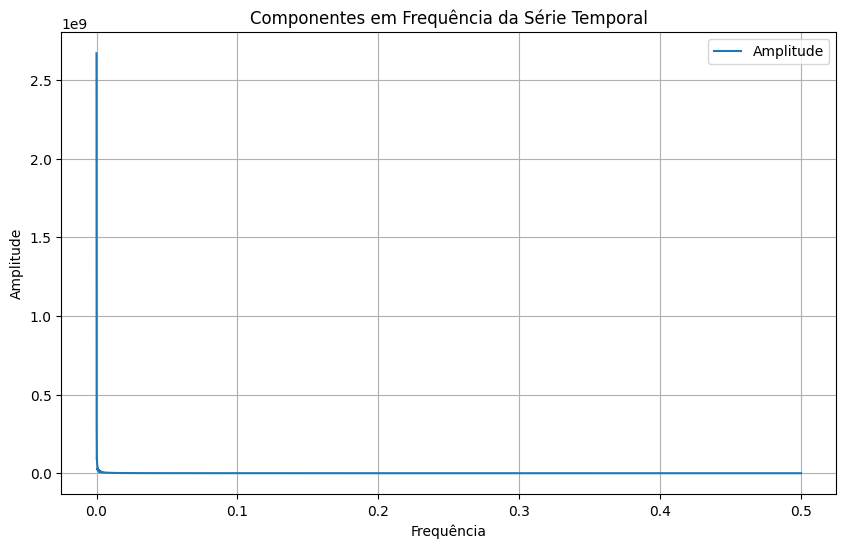

In [25]:
# Plot da amplitude versus frequência
plt.figure(figsize=(10, 6))
plt.plot(xf[:n // 2], np.abs(yf[:n // 2]), label='Amplitude')  # Apenas a metade positiva das frequências
plt.xlabel('Frequência')
plt.ylabel('Amplitude')
plt.title('Componentes em Frequência da Série Temporal')
plt.grid()
plt.legend()
plt.show()

In [24]:
len(yf)

10319

In [1]:
import numpy as np
import plotly.graph_objects as go
from ipywidgets import interact

# Function to handle Fourier Transform and plotting
def update_plot(time_series, num_components=1, num_points=None):
    # Handle number of points for resampling
    if num_points is None or num_points > len(time_series):
        num_points = len(time_series)
    
    # Resample the time series if necessary
    x = np.linspace(0, len(time_series) - 1, num_points)
    y = np.interp(x, np.arange(len(time_series)), time_series)
    
    # Compute Fourier Transform
    y_fft = np.fft.fft(y)
    frequencies = np.fft.fftfreq(len(y), d=(x[1] - x[0]))
    
    # Filter components
    y_fft_filtered = np.zeros_like(y_fft)
    y_fft_filtered[:num_components] = y_fft[:num_components]
    y_fft_filtered[-num_components:] = y_fft[-num_components:]
    reconstructed_signal = np.fft.ifft(y_fft_filtered).real
    
    # Plot 1: Original vs Reconstructed Signal
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Original Time Series'))
    fig.add_trace(go.Scatter(x=x, y=reconstructed_signal, mode='lines', 
                             name=f'Reconstructed ({num_components} Components)'))
    fig.update_layout(title="Original vs Reconstructed Signal", 
                      xaxis_title="Index", yaxis_title="Value", legend_title="Legend")
    
    # Plot 2: Frequency Components
    fig2 = go.Figure()
    fig2.add_trace(go.Scatter(x=frequencies[:len(frequencies)//2], y=np.abs(y_fft[:len(y_fft)//2]),
                              mode='lines+markers', name='All Components'))
    fig2.add_trace(go.Scatter(x=frequencies[:num_components], y=np.abs(y_fft[:num_components]),
                              mode='markers', name='Selected Components'))
    fig2.update_layout(title="Frequency Components", 
                       xaxis_title="Frequency", yaxis_title="Amplitude", legend_title="Legend")
    
    return fig, fig2

# Interactive sliders
def interactive_plot(time_series):
    @interact(num_components=(1, min(50, len(time_series)//2), 1), num_points=(10, len(time_series), 10))
    def _interactive(num_components=1, num_points=len(time_series)):
        fig1, fig2 = update_plot(time_series, num_components, num_points)
        fig1.show()
        fig2.show()

# Example usage with a given time series
time_series = np.sin(2 * np.pi * np.linspace(0, 1, 100)) + 0.5 * np.random.rand(100)  # Example noisy sine wave
interactive_plot(time_series)


interactive(children=(IntSlider(value=1, description='num_components', max=50, min=1), IntSlider(value=100, de…